In [1]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors



# svm.SVC API说明： 
功能：使用SVM分类器进行模型构建*  
参数说明：
C: 误差项的惩罚系数，默认为1.0；一般为大于0的一个数字，C越大表示在训练过程中对于总误差的关注度越高，也就是说当C  越大的时候，对于训练集的表现会越好，但是有可能引发过度拟合的问题(overfiting)  
kernel：指定SVM内部函数的类型，可选值：linear、poly、rbf、sigmoid、precomputed(基本不用，有前提要求，要求特征属性数目和样本数目一样)；默认是rbf；   
degree：当使用多项式函数作为svm内部的函数的时候，给定多项式的项数，默认为3  
gamma：当SVM内部使用poly、rbf、sigmoid的时候，核函数的系数值，当默认值为auto的时候，实际系数为1/n_features   
coef0: 当核函数为poly或者sigmoid的时候，给定的独立系数，默认为0   
probability：是否启用概率估计，默认不启动，不太建议启动   
shrinking：是否开启收缩启发式计算，默认为True   
tol: 模型构建收敛参数，当模型的的误差变化率小于该值的时候，结束模型构建过程，默认值:1e-3  
cache_size：在模型构建过程中，缓存数据的最大内存大小，默认为空，单位MB   
class_weight：给定各个类别的权重，默认为空  
max_iter：最大迭代次数，默认-1表示不限制   
decision_function_shape: 决策函数，可选值：ovo和ovr，默认为None；推荐使用ovr；（1.7以上版本才有）



# 1.使用numpy中的loadtxt读取数据文件
*当使用numpy中的loadtxt函数导入该数据集时，假设数据类型dtype为浮点型，但是很明显第五列的数据类型并不是浮点型。*

*因此我们要额外做一个工作，即通过loadtxt()函数中的converters参数将第五列通过转换函数映射成浮点类型的数据。*

In [2]:
# 转换函数
# 定义一个函数，将不同类别标签与数字相对应
def iris_type(s):
    it = {b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2}
    return it[s]
# 为啥前面要加个b?
# 报错本身的提示的意思是：字典中没有'Iris-setosa'这个键，却试图访问它。
# 所以，鉴于这个是从文件读取的，因此，最大的可能是字符编码问题

# 数据文件路径
path = 'iris.txt'
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4:iris_type})
# 以上4个参数分别表示：
# filepath ：文件路径。eg：C:/Dataset/iris.txt。
# dtype=float ：数据类型。eg：float、str等。
# delimiter=',' ：数据以什么分割符号分割。eg：‘，’。
# converters={4:iris_type} ：对某一列数据（第四列）进行某种类型的转换，将数据列与转换函数进行映射的字典。eg：{1:fun}，含义是将第2列对应转换函数进行转换。
#                          converters={4: iris_type}中“4”指的是第5列。


# 2.将Iris分为训练集和测试集
*1. split(数据，分割位置，轴=1（水平分割） or 0（垂直分割）)。*

*2. x = x[:, :2]是为方便后期画图更直观，故只取了前两列特征值向量训练。*
  
*3. sklearn.model_selection.train_test_split随机划分训练集与测试集。train_test_split(train_data,train_target,test_size=数字, random_state=0)*

*参数解释：*

*train_data：所要划分的样本特征集*

*train_target：所要划分的样本结果*

*test_size：样本占比，如果是整数的话就是样本的数量*

*random_state：是随机数的种子。*

*随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。*


In [3]:
x, y = np.split(data, (4,), axis=1)  # np.split 按照列（axis=1）进行分割，从第四列开始往后的作为y数据，之前的作为X数据。
x = x[:, :2]  # 取出前两列
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# 3.搭建模型，训练SVM分类器
*kernel='linear'时，为线性核，C越大分类效果越好，但有可能会过拟合（defaul C=1）。*

*kernel='rbf'时（default），为高斯核，gamma值越小，分类界面越连续；gamma值越大，分类界面越“散”，分类效果越好，但有可能会过拟合。*

*decision_function_shape='ovr'时，为one v rest，即一个类别与其他类别进行划分*

*decision_function_shape='ovo'时，为one v one，即将类别两两之间进行划分，用二分类的方法模拟多分类的结果。*


In [4]:
# clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
# 开始训练
clf.fit(x_train, y_train.ravel())  # 想一想，这里为什么要用ravel()
print(y_train.ravel())
# 调用ravel()函数将矩阵转变成一维数组（ravel()函数与flatten()的区别）
# 两者所要实现的功能是一致的（将多维数组降为一维），
# 两者的区别在于返回拷贝（copy）还是返回视图（view），
# numpy.flatten() 返回一份拷贝，对拷贝所做的修改不会影响（reflects）原始矩阵，
# 而numpy.ravel()返回的是视图（view），会影响（reflects）原始矩阵。


[ 0.  2.  2.  0.  0.  2.  0.  2.  2.  1.  1.  2.  2.  0.  1.  1.  2.  1.
  2.  1.  0.  0.  0.  2.  0.  1.  2.  2.  0.  0.  1.  0.  2.  1.  2.  2.
  1.  2.  2.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  2.  2.  2.  0.  0.
  1.  0.  2.  0.  2.  2.  0.  2.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.
  1.  0.  1.  1.  1.  1.  2.  0.  0.  2.  1.  2.  1.  2.  2.  1.  2.  0.]


In [5]:
def show_accuracy(y_hat, y_train, str):
    pass

# 4.计算SVC分类器的准确率

In [6]:
print("SVM-输出训练集的准确率为：",clf.score(x_train, y_train))  # 精度
y_hat = clf.predict(x_train)
show_accuracy(y_hat, y_train, '训练集')

print("SVM-输出测试集的准确率为：",clf.score(x_test, y_test))
y_hat = clf.predict(x_test)
show_accuracy(y_hat, y_test, '测试集')

# 如果想要查看决策函数，可以通过decision_function()实现.decision_function中每一列的值代表距离各类别的距离。
print('decision_function:\n',clf.decision_function(x_train))
print('\npredict:\n',clf.predict(x_train))

SVM-输出训练集的准确率为： 0.866666666667
SVM-输出测试集的准确率为： 0.65
decision_function:
 [[ 2.45540648  0.80337522 -0.2587817 ]
 [-0.4368348   2.31950945  1.11732536]
 [-0.43793789  1.00917055  2.42876733]
 [ 2.45555373  0.80242493 -0.25797866]
 [ 2.46185007  0.80020899 -0.26205906]
 [-0.4275673   0.97215049  2.4554168 ]
 [ 2.4554096   0.80344613 -0.25885573]
 [-0.42578192  2.23549613  1.19028579]
 [-0.33298947  0.85928729  2.47370219]
 [-0.48605671  1.11023326  2.37582345]
 [-0.46698316  2.45555939  1.01142377]
 [-0.34393526  0.88836411  2.45557115]
 [-0.45654511  2.24846454  1.20808056]
 [ 2.45540023  0.80337522 -0.25877545]
 [-0.26186033  2.455375    0.80648533]
 [-0.43948259  1.07549979  2.3639828 ]
 [-0.4275673   0.97215049  2.4554168 ]
 [-0.31788553  2.45549167  0.86239386]
 [-0.27857189  0.80842625  2.47014564]
 [-0.34853299  2.45530975  0.89322324]
 [ 2.44451224  0.80934383 -0.25385607]
 [ 2.48392766  0.78928739 -0.27321505]
 [ 2.36830493  0.84753105 -0.21583598]
 [-0.34393526  0.88836411  2.45

# 5.绘制图像


grid_test = 
 [[ 4.3        2.       ]
 [ 4.3        2.0120603]
 [ 4.3        2.0241206]
 ..., 
 [ 7.9        4.3758794]
 [ 7.9        4.3879397]
 [ 7.9        4.4      ]]
[ 1.  1.  1. ...,  1.  1.  1.]
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
x_test: 
 [[ 5.8  4. ]
 [ 5.1  2.5]
 [ 6.6  3. ]
 [ 5.4  3.9]
 [ 7.9  3.8]
 [ 6.3  3.3]
 [ 6.9  3.1]
 [ 5.1  3.8]
 [ 4.7  3.2]
 [ 6.9  3.2]
 [ 5.6  2.7]
 [ 5.4  3.9]
 [ 7.1  3. ]
 [ 6.4  3.2]
 [ 6.   2.9]
 [ 4.4  3.2]
 [ 5.8  2.6]
 [ 5.6  3. ]
 [ 5.4  3.4]
 [ 5.   3.2]
 [ 5.5  2.6]
 [ 5.4  3. ]
 [ 6.7  3. ]
 [ 5.   3.5]
 [ 7.2  3.2]
 [ 5.7  2.8]
 [ 5.5  4.2]
 [ 5.1  3.8]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  3. ]
 [ 7.7  3. ]
 [ 5.6  2.5]
 [ 6.4  2.8]
 [ 5.8  2.8]
 [ 5.3  3.7]
 [ 5.5  2.3]
 [ 5.2  3.4]
 [ 6.5  2.8]
 [ 6.7  2.5]
 [ 6.8  3. ]
 [ 5.1  3.5]
 [ 6.   2.2]
 [ 6.3  2.9]
 [ 6.6  2.9]
 [

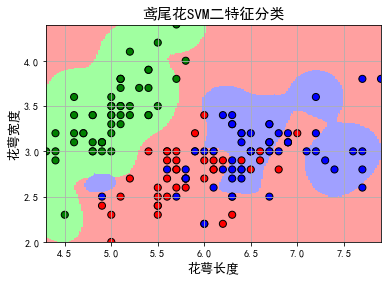

In [8]:
# （1）确定坐标轴范围，x,y轴分别表示两个特征
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围  x[:, 0] "："表示所有行，0表示第1列
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围  x[:, 0] "："表示所有行，1表示第2列
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点（用meshgrid函数生成两个网格矩阵X1和X2）,可以接受两个一维数组生成两个二维矩阵
# meshgrid的作用是根据传入的两个一维数组参数生成两个数组元素的列表。
# 如果第一个参数是xarray，维度是xdimesion，第二个参数是yarray，维度是ydimesion。
# 那么生成的第一个二维数组是以xarray为行，ydimesion行的向量；而第二个二维数组是以yarray的转置为列，xdimesion列的向量。
# print(x1)
# print(x2)
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点，再通过stack()函数，axis=1表示按垂直方向拼接，生成测试点
# .flat 将矩阵转变成一维数组 （与ravel()的区别：flatten：返回的是拷贝
print('grid_test = \n', grid_test)
grid_hat = clf.predict(grid_test)  # 预测分类值
print(grid_hat)
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同  为什么要有这一步？
print(grid_hat)

# （2）指定默认字体
mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# (3) 绘制
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)  # pcolormesh(x,y,z,cmap)这里参数代入x1，x2，grid_hat，cmap=cm_light绘制的是背景。plt.pcolormesh()会根据grid_hat的结果自动在cmap里选择颜色
plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), edgecolors='k', s=50, cmap=cm_dark)  # 样本  scatter中edgecolors是指描绘点的边缘色彩，s指描绘点的大小，cmap指点的颜色。
# 上面scatter()里面的参数传入的都是列表，所以需要的对y进行y.ravel()处理
print('x_test: \n', x_test)
plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolors='none', zorder=10)  # 圈中测试样本  
print(x1_min)
plt.xlim(x1_min, x1_max)  # 指图的边界
plt.ylim(x2_min, x2_max)
plt.xlabel(u'花萼长度', fontsize=13)
plt.ylabel(u'花萼宽度', fontsize=13)
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
plt.grid()
plt.show()


